## Lecture 2 Exercises: Comparing genotype files

Write a python script that compares the similarity of two individuals given the genotypes in their 23andMe files, based on Identity By State (IBS). The program should take in two 23andMe files and calculate by comparing the genotypes in both files. There are three possible scores at each locus: 0 for no shared alleles, 1 for one shared allele, 2 for both alleles shared. Add the similarity scores for each locus and divide by the maximum possible score to get the average. Only consider the autosomal chromosomes (not the X or Y chromosomes or the mitochondrial SNPs).

In [1]:
# Import libraries
import os 
import pandas as pd
import numpy as np
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

# Parse 23andMe file
def parse_23andme(file_path):
    genotypes = {}
    
    print(f"Parsing {file_path}...")

    with open(file_path, 'r') as f:
        for line in f:
            # Skip header 
            if line.startswith('#'):
                continue
            
            # Extract info: rsid, chromosome, position, genotype
            parts = line.strip().split('\t')
            chrom = parts[1]
            pos = parts[2]
            gt_str = parts[3]
            
            # Filter Autosomes (1-22 only)
            if chrom in ['X', 'Y', 'MT']:
                continue
            
            # Skip no called SNPs: '--' 
            if '-' in gt_str:
                continue
            
            alleles = list(gt_str)
            alleles.sort() # Sort them: "AG" is treated same as "GA"
            
            # Store in dictionary with (chrom, pos) as key
            genotypes[(chrom, pos)] = alleles
    
    return genotypes

# Calculate IBS score (0, 1, or 2) given 2 alleles
def calculate_ibs_score(alleles1, alleles2):
    # Exact match 
    if alleles1 == alleles2:
        return 2
    
    # Check if any allele from human 1 is in human 2
    shared = 0
    for i in range(len(alleles1)):
        if alleles1[i] == alleles2[i]:
            shared += 1
    
    return shared


def ibs_between_files(file1,file2):
    # Parse files
    person1_data = parse_23andme(file1)
    person2_data = parse_23andme(file2)
    
    # Find shared loci. Only compare positions that exist in BOTH files
    common_loci = set(person1_data.keys()).intersection(set(person2_data.keys()))
    
    if not common_loci:
        print("No shared autosomal loci found")
        exit(1)

    num_loci = len(common_loci)

    # Calculate scores
    total_score = 0
    for locus in common_loci:
        gt1 = person1_data[locus]
        gt2 = person2_data[locus]
        score = calculate_ibs_score(gt1, gt2)
        total_score += score
        
    # Calculate Max score and average score
    max_possible_score = num_loci * 2
    average_similarity = total_score / max_possible_score
    
    # Print Results
    print("-" * 40)
    print(f"Shared Loci:    {num_loci}")
    print(f"Total IBS Score:      {total_score}")
    print(f"Max Possible Score:   {max_possible_score}")
    print(f"Similarity Score:     {average_similarity:.5f}")
    print("-" * 40)

    return average_similarity
        

Run your program to compute the IBS between each pair of individuals. As a sanity check, run your program also to compute the IBS between each individual and his/herself. If the self-similarity is not equal to 1, your program is not working correctly. What is the IBS between each of the 21 pairs?

In [2]:
# 23andMe files
Cristelle_Chirwa_file = '/Users/kmlanderos/Documents/Johns_Hopkins/Spring_2026/Annotate_a_Genome/data/excercise2/Cristelle_ChirwaDNA23andMe_v5_Full_20180208094401.txt'
Oliver_Moadel_file = '/Users/kmlanderos/Documents/Johns_Hopkins/Spring_2026/Annotate_a_Genome/data/excercise2/Oliver_MoadelDNA23andMe_v5_Full_20180130222634.txt'
Terion_Miller_file = '/Users/kmlanderos/Documents/Johns_Hopkins/Spring_2026/Annotate_a_Genome/data/excercise2/Terion_MillerDNA23andMe_v4_Full_20180506195602.txt'
Kate_Sheridan_file = '/Users/kmlanderos/Documents/Johns_Hopkins/Spring_2026/Annotate_a_Genome/data/excercise2/Kate_SheridanDNA23andMe_v5_Full_20180523150056.txt'
Rachel_Karchin_file = '/Users/kmlanderos/Documents/Johns_Hopkins/Spring_2026/Annotate_a_Genome/data/excercise2/Rachel_KarchinDNA23andMe_v4_Full_20241229220425.txt'
Lisa_Fauman_file = '/Users/kmlanderos/Documents/Johns_Hopkins/Spring_2026/Annotate_a_Genome/data/excercise2/Lisa_FaumanDNA23andMe_v5_Full_20180326062517.txt'
Steve_Salzberg_file = '/Users/kmlanderos/Documents/Johns_Hopkins/Spring_2026/Annotate_a_Genome/data/excercise2/Steve_SalzbergDNA23andMe_v3.txt'

In [ ]:
# All comparisons
files = [
    Cristelle_Chirwa_file, 
    Oliver_Moadel_file, 
    Terion_Miller_file, 
    Kate_Sheridan_file, 
    Rachel_Karchin_file, 
    Lisa_Fauman_file, 
    Steve_Salzberg_file
]

names = [
    "Cristelle Chirwa", 
    "Oliver Moadel", 
    "Terion Miller", 
    "Kate Sheridan", 
    "Rachel Karchin", 
    "Lisa Fauman", 
    "Steve Salzberg"
]

# Define results matrix
n = len(files)
ibs_matrix = np.zeros((n, n))

# Loop through every pair, calculate IBS, and store it
for i in range(n):
    for j in range(n):
        # Calculate IBS between files
        score = ibs_between_files(files[i], files[j])
        # Store in matrix
        ibs_matrix[i, j] = score

ibs_df = pd.DataFrame(ibs_matrix, index=names, columns=names)


Parsing /Users/kmlanderos/Documents/Johns_Hopkins/Spring_2026/Annotate_a_Genome/data/excercise2/Cristelle_ChirwaDNA23andMe_v5_Full_20180208094401.txt...
Parsing /Users/kmlanderos/Documents/Johns_Hopkins/Spring_2026/Annotate_a_Genome/data/excercise2/Cristelle_ChirwaDNA23andMe_v5_Full_20180208094401.txt...
----------------------------------------
Shared Loci:    600353
Total IBS Score:      1200706
Max Possible Score:   1200706
Similarity Score:     1.00000
----------------------------------------
Parsing /Users/kmlanderos/Documents/Johns_Hopkins/Spring_2026/Annotate_a_Genome/data/excercise2/Cristelle_ChirwaDNA23andMe_v5_Full_20180208094401.txt...
Parsing /Users/kmlanderos/Documents/Johns_Hopkins/Spring_2026/Annotate_a_Genome/data/excercise2/Oliver_MoadelDNA23andMe_v5_Full_20180130222634.txt...
----------------------------------------
Shared Loci:    596689
Total IBS Score:      1023919
Max Possible Score:   1193378
Similarity Score:     0.85800
----------------------------------------
P

In [4]:
ibs_df

,Cristelle Chirwa,Oliver Moadel,Terion Miller,Kate Sheridan,Rachel Karchin,Lisa Fauman,Steve Salzberg
Cristelle Chirwa,1.000000,0.858001,0.747922,0.860671,0.742942,0.858851,0.729856
Oliver Moadel,0.858001,1.000000,0.742789,0.858882,0.744450,0.859347,0.730699
Terion Miller,0.747922,0.742789,1.000000,0.749008,0.765167,0.745134,0.743121
Kate Sheridan,0.860671,0.858882,0.749008,1.000000,0.742383,0.860075,0.730859
Rachel Karchin,0.742942,0.744450,0.765167,0.742383,1.000000,0.745125,0.747013
Lisa Fauman,0.858851,0.859347,0.745134,0.860075,0.745125,1.000000,0.733175
Steve Salzberg,0.729856,0.730699,0.743121,0.730859,0.747013,0.733175,1.000000


Make a hierarchical clustering dendrogram for the seven individuals based on IBS similarity scores. You will have to convert the IBS similarity matrix into a distance matrix by subtracting the IBS scores from one (so the most similar genotypes are “closest” to each other with small scores). In Python, these modules will provide everything you need: numpy, scipy.cluster.hierarchy (dendrogram and linkage) and matplotlib.pyplot. For the linkage function, use the 'ward' method, and 'euclidean' metric.

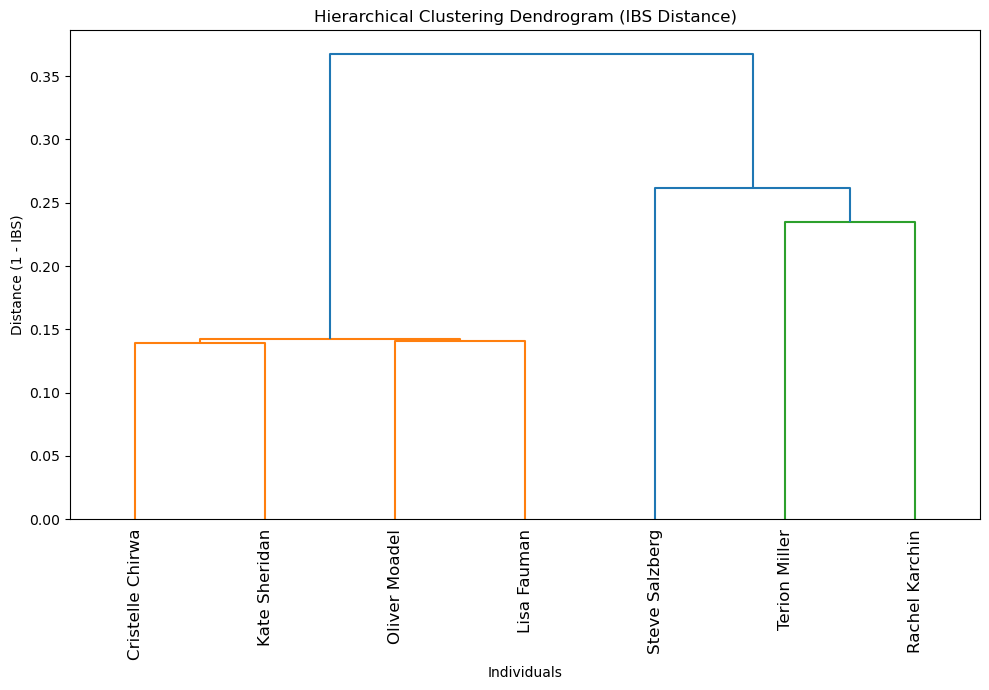

In [ ]:
# ----- Dendogram ----- #

# Convert Similarity Matrix to Distance Matrix
distance_matrix = 1 - ibs_matrix

# Hierarchical Clustering
condensed_dist = squareform(distance_matrix)
Z = linkage(condensed_dist, method='ward', metric='euclidean')

# Plot Dendrogram
plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram (IBS Distance)")
plt.xlabel("Individuals")
plt.ylabel("Distance (1 - IBS)")

dendrogram(
    Z,
    labels=names,
    leaf_rotation=90.,
    leaf_font_size=12.,
)

plt.tight_layout()
plt.show()